In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
from scikit_posthocs import posthoc_dunn
from statsmodels.stats.multitest import multipletests
from scipy import stats

In [ ]:
# Function to create plots with asterisks just above the x-axis
def create_violin_plot(data, x, y, hue, title, ylabel, significant_syllables):
    plt.figure(figsize=(10, 6))
    ax = sns.violinplot(data=data, x=x, y=y, hue=hue, split=True, inner='quartile')
    plt.title(title)
    plt.xlabel('Syllable Index')
    plt.ylabel(ylabel)

    # Add asterisks just above the x-axis using axes transformation
    for syllable in significant_syllables:
        # The x-coordinate is the syllable, and y-coordinate is just above the x-axis (in axes coordinates)
        ax.text(syllable, .04, '*', transform=ax.get_xaxis_transform(), ha='center', va='top', fontsize=20, color='red')
    
    plt.show()

In [ ]:
# recall4 data
recall1_cond_df = pd.read_csv('recall1_stats_df_condition_0612.csv')
recall1_age_df = pd.read_csv('recall1_stats_df_age_0612.csv')
recall1_sex_df = pd.read_csv('recall1_stats_df_sex_0612.csv')

recall1_cond_df = recall1_cond_df.sort_values(['name', 'syllable']).reset_index(drop=True)
recall1_age_df = recall1_age_df.sort_values(['name', 'syllable']).reset_index(drop=True)
recall1_sex_df = recall1_sex_df.sort_values(['name', 'syllable']).reset_index(drop=True)

# to prevent the data from rounding errors 
decimal_places = 8
recall1_cond_df = recall1_cond_df.round(decimal_places)
recall1_age_df = recall1_age_df.round(decimal_places)
recall1_sex_df = recall1_sex_df.round(decimal_places)

# extract property information 
age = recall1_age_df[['name', 'syllable', 'group']]
sex = recall1_sex_df[['name', 'syllable', 'group']]

# Mergeg all group information
recall1_cond_df = recall1_cond_df.merge(age, on=['name', 'syllable'], suffixes=('', '_age'))
recall1_cond_df = recall1_cond_df.merge(sex, on=['name', 'syllable'], suffixes=('', '_sex'))

#rename all group information columns  
recall1_moseq_data = recall1_cond_df.rename(columns={'group': 'condition', 'group_age': 'age', 'group_sex': 'sex'})

recall1_moseq_data.head(10)

,condition,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration,age,sex
0,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,0,0.626208,1.852853,-3.108747,3.122723,-0.000510,17.404694,-183.203679,188.040866,81.701471,75.348639,1.813967,420.626644,0.203390,1.305556,young,male
1,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,1,0.047414,1.886025,-3.118931,3.088203,-0.306084,21.693177,-186.768078,186.453910,114.326372,71.326542,5.065943,324.631877,0.084746,2.040000,young,male
2,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,2,2.541553,0.006534,2.530331,2.554167,0.513064,1.403439,-1.160512,3.587451,19.581478,13.585931,1.088061,45.789062,0.016949,0.800000,young,male
3,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,3,1.040338,2.274850,-2.304735,2.978832,-5.650671,33.930670,-185.178904,3.523885,29.659879,24.827263,1.021446,113.470288,0.084746,0.400000,young,male
4,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,4,1.190056,0.914027,-2.351293,2.675502,0.466974,4.355024,-5.952834,13.459587,98.441224,64.394974,3.216328,286.923149,0.084746,1.426667,young,male
5,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,5,1.591083,1.391498,-2.918128,2.984716,0.606301,15.508504,-9.353394,179.743852,57.037060,64.958918,4.752641,370.035373,0.067797,2.300000,young,male
6,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,6,0.513579,1.393588,-1.466723,2.905437,3.107282,10.342098,-40.495488,38.495383,121.945589,62.437526,15.226925,265.955670,0.033898,1.366667,young,male
7,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,7,-2.098126,0.413054,-2.465035,-1.097394,2.729345,2.644754,0.713620,7.987800,74.586815,42.689324,8.890899,131.081876,0.016949,1.066667,young,male
8,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,8,-0.654046,2.269390,-3.130824,3.139795,-1.881786,41.805873,-187.878988,187.563840,123.793678,66.685021,0.000000,324.182662,0.084746,2.680000,young,male
9,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,9,-1.111840,2.055914,-3.117722,2.903392,2.370174,46.514172,-182.107538,182.445727,69.507202,43.389691,15.498033,170.455945,0.067797,0.533333,young,male


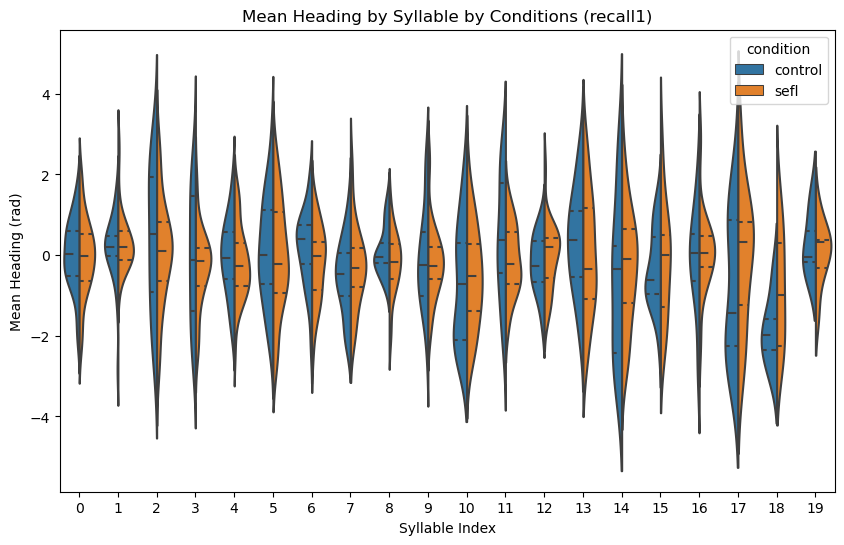

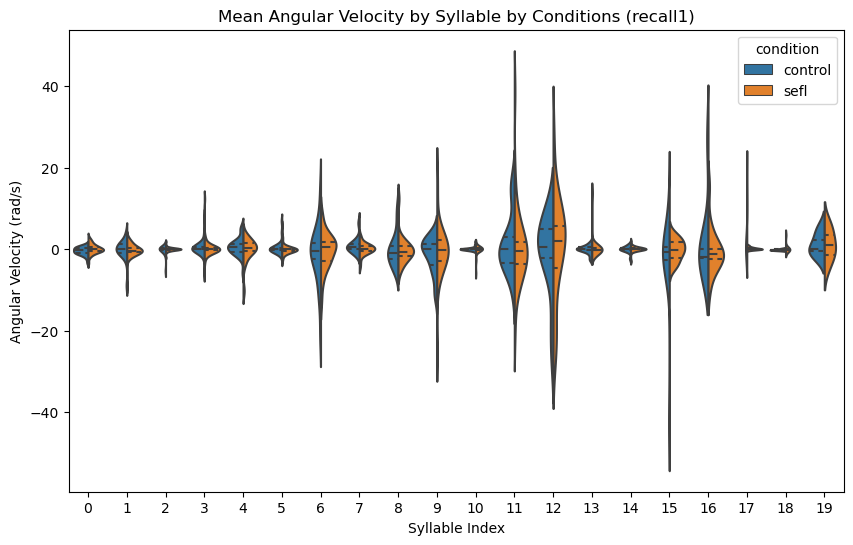

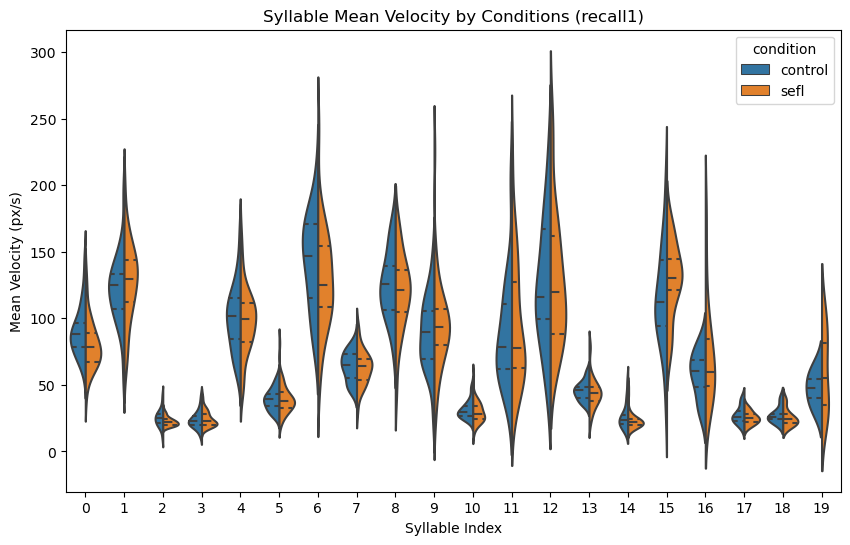

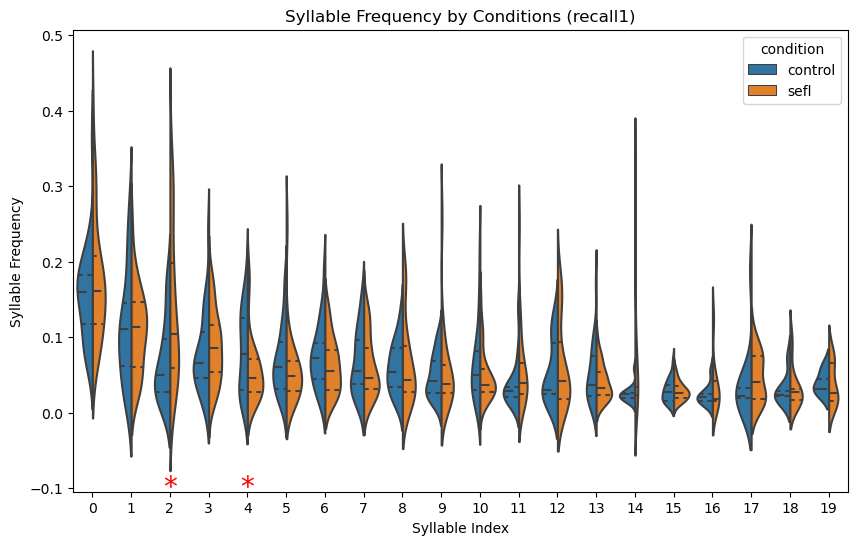

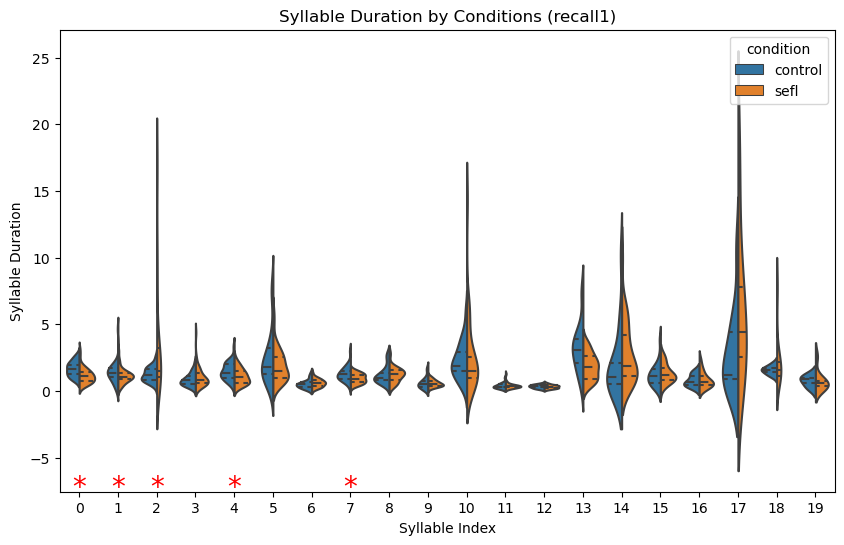

In [ ]:
#violin plot on stats for sefl vs. control (condition)

significant_syllables_heading = []
significant_syllables_angular_velocity = []
significant_syllables_velocity = []
significant_syllables_frequency = [2, 4]
significant_syllables_duration = [0, 1, 2, 4, 7]

# Create each plot with asterisks marking significant syllables
create_violin_plot(recall1_moseq_data, 'syllable', 'heading_mean', 'condition', 'Mean Heading by Syllable by Conditions (recall1)', 'Mean Heading (rad)', significant_syllables_heading)
create_violin_plot(recall1_moseq_data, 'syllable', 'angular_velocity_mean', 'condition', 'Mean Angular Velocity by Syllable by Conditions (recall1)', 'Angular Velocity (rad/s)', significant_syllables_angular_velocity)
create_violin_plot(recall1_moseq_data, 'syllable', 'velocity_px_s_mean', 'condition', 'Syllable Mean Velocity by Conditions (recall1)', 'Mean Velocity (px/s)', significant_syllables_velocity)
create_violin_plot(recall1_moseq_data, 'syllable', 'frequency', 'condition', 'Syllable Frequency by Conditions (recall1)', 'Syllable Frequency', significant_syllables_frequency)
create_violin_plot(recall1_moseq_data, 'syllable', 'duration', 'condition', 'Syllable Duration by Conditions (recall1)', 'Syllable Duration', significant_syllables_duration)


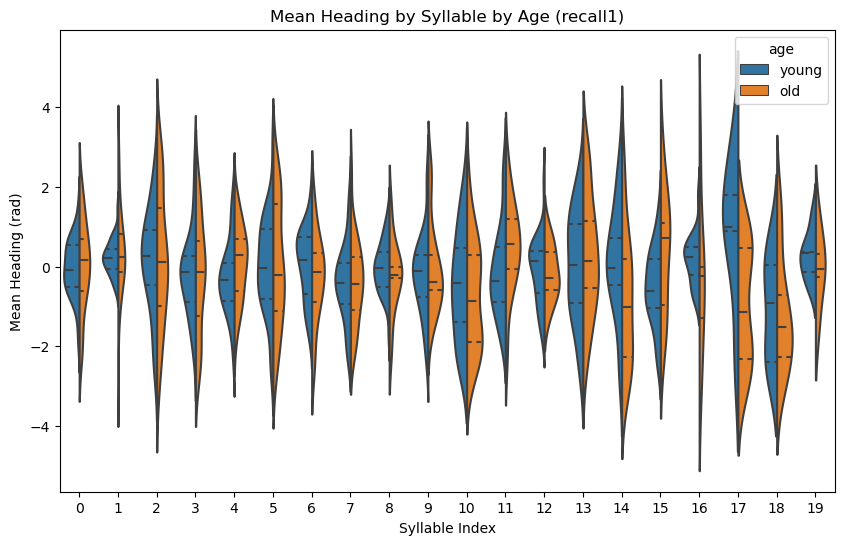

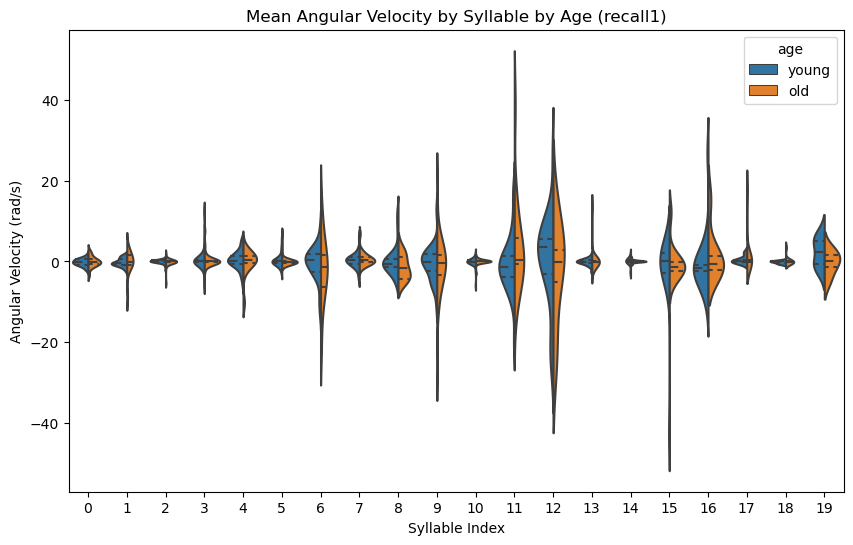

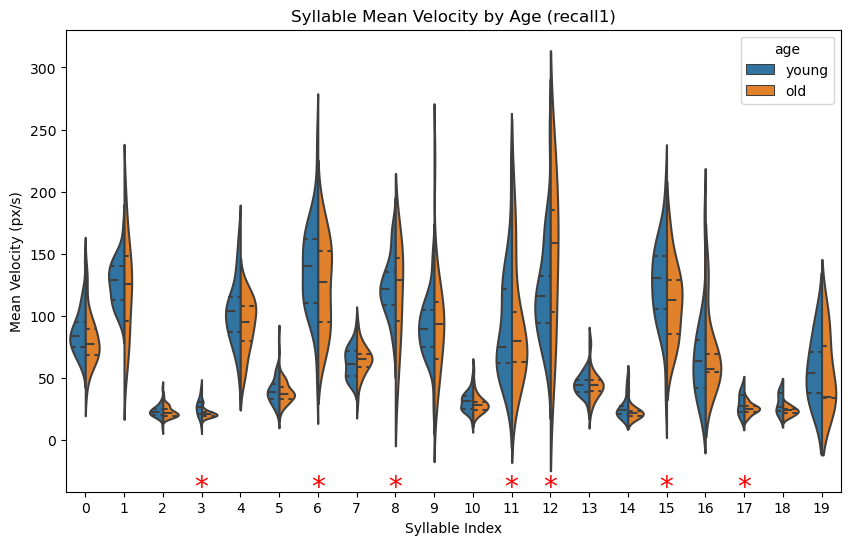

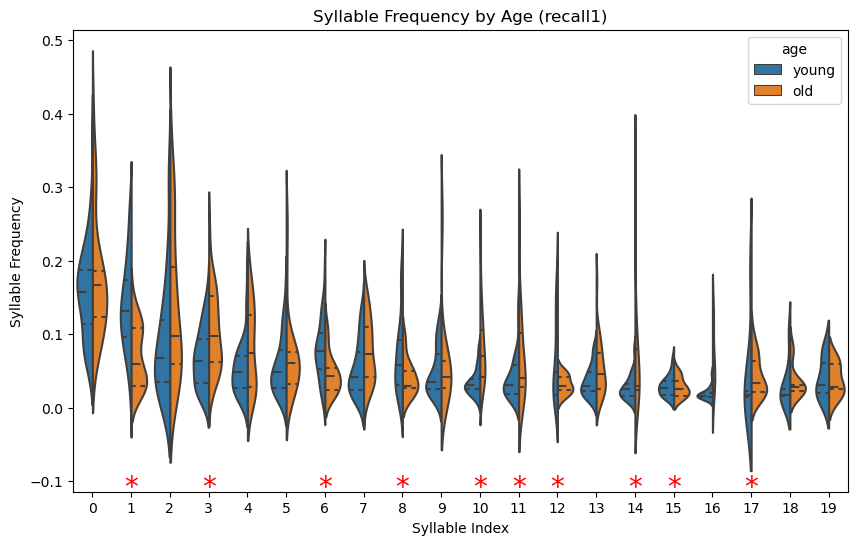

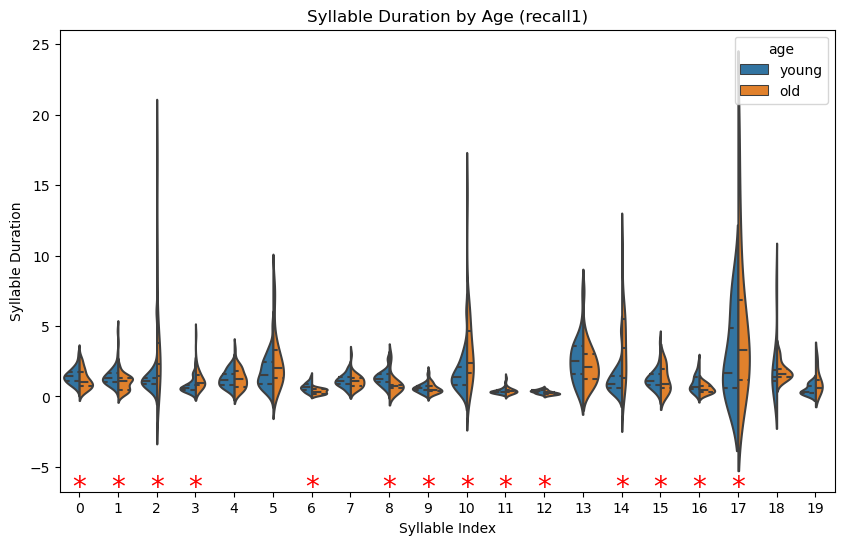

In [ ]:
#violin plot on stats for young vs. old (age)

significant_syllables_heading = []
significant_syllables_angular_velocity = []
significant_syllables_frequency = [1, 3, 6, 8, 10, 11, 12, 14, 15, 17]
significant_syllables_velocity = [3, 6, 8, 11, 12, 15, 17]
significant_syllables_duration = [0, 1, 2, 3, 6, 8, 9, 10, 11, 12, 14, 15, 16, 17]

# Create each plot with asterisks marking significant syllables
create_violin_plot(recall1_moseq_data, 'syllable', 'heading_mean', 'age', 'Mean Heading by Syllable by Age (recall1)', 'Mean Heading (rad)', significant_syllables_heading)
create_violin_plot(recall1_moseq_data, 'syllable', 'angular_velocity_mean', 'age', 'Mean Angular Velocity by Syllable by Age (recall1)', 'Angular Velocity (rad/s)', significant_syllables_angular_velocity)
create_violin_plot(recall1_moseq_data, 'syllable', 'velocity_px_s_mean', 'age', 'Syllable Mean Velocity by Age (recall1)', 'Mean Velocity (px/s)', significant_syllables_velocity)
create_violin_plot(recall1_moseq_data, 'syllable', 'frequency', 'age', 'Syllable Frequency by Age (recall1)', 'Syllable Frequency', significant_syllables_frequency)
create_violin_plot(recall1_moseq_data, 'syllable', 'duration', 'age', 'Syllable Duration by Age (recall1)', 'Syllable Duration', significant_syllables_duration)

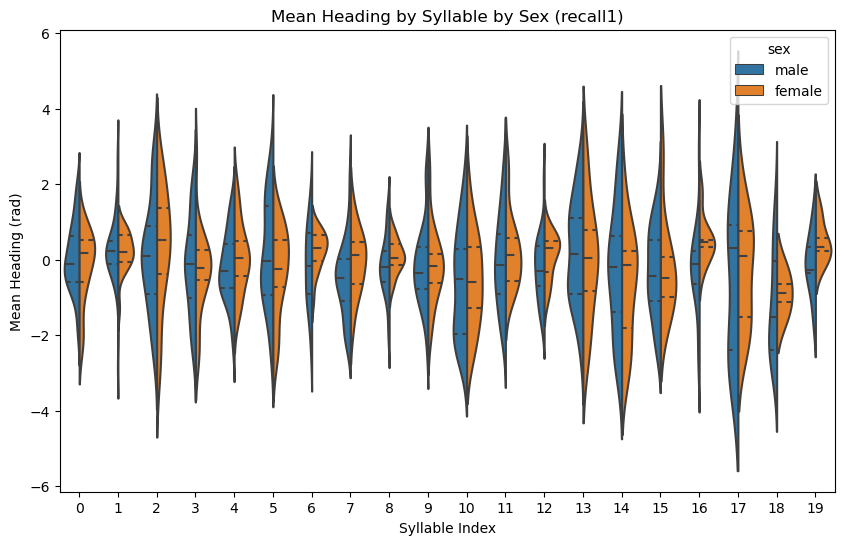

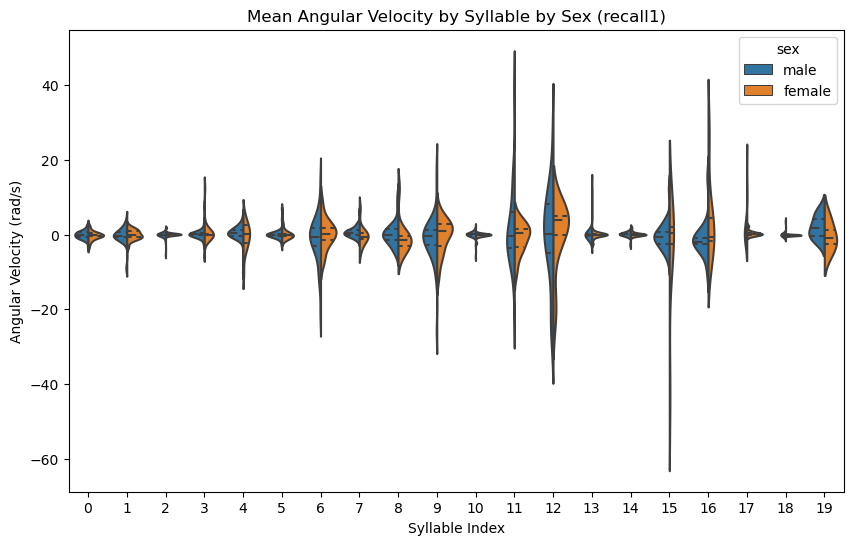

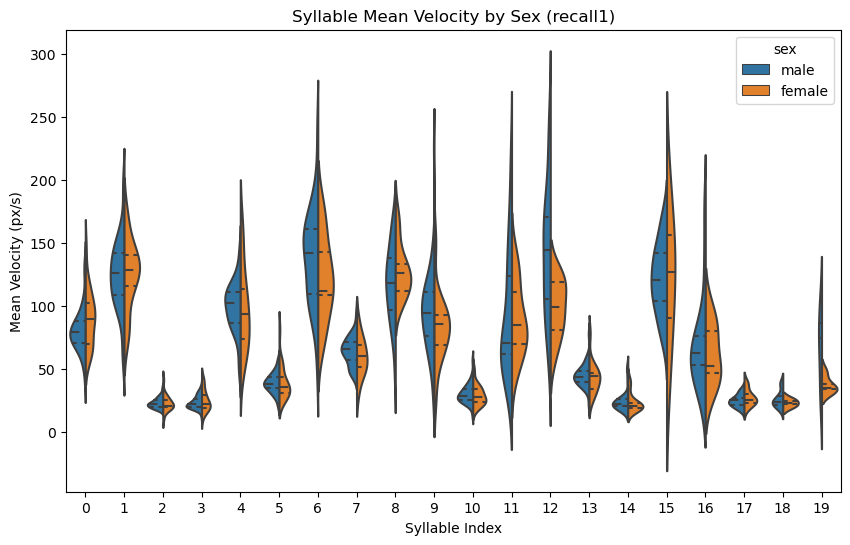

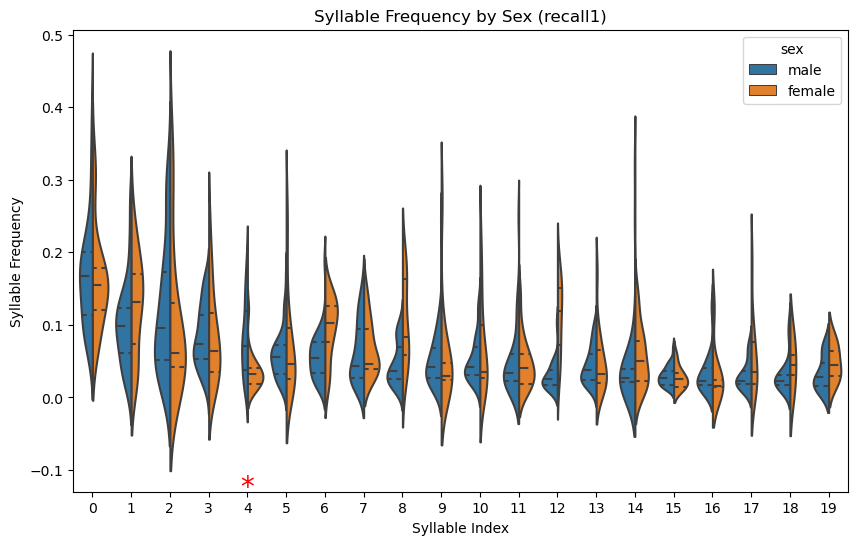

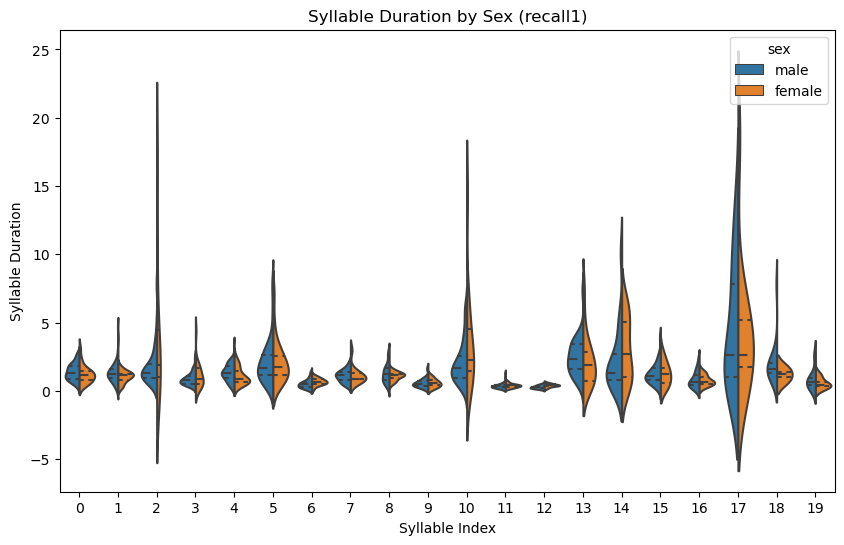

In [ ]:
#violin plot on stats for male vs. female (sex)

significant_syllables_heading = []
significant_syllables_angular_velocity = []
significant_syllables_frequency = [4]
significant_syllables_velocity = []
significant_syllables_duration = []

# Create each plot with asterisks marking significant syllables
create_violin_plot(recall1_moseq_data, 'syllable', 'heading_mean', 'sex', 'Mean Heading by Syllable by Sex (recall1)', 'Mean Heading (rad)', significant_syllables_heading)
create_violin_plot(recall1_moseq_data, 'syllable', 'angular_velocity_mean', 'sex', 'Mean Angular Velocity by Syllable by Sex (recall1)', 'Angular Velocity (rad/s)', significant_syllables_angular_velocity)
create_violin_plot(recall1_moseq_data, 'syllable', 'velocity_px_s_mean', 'sex', 'Syllable Mean Velocity by Sex (recall1)', 'Mean Velocity (px/s)', significant_syllables_velocity)
create_violin_plot(recall1_moseq_data, 'syllable', 'frequency', 'sex', 'Syllable Frequency by Sex (recall1)', 'Syllable Frequency', significant_syllables_frequency)
create_violin_plot(recall1_moseq_data, 'syllable', 'duration', 'sex', 'Syllable Duration by Sex (recall1)', 'Syllable Duration', significant_syllables_duration)

In [ ]:
# recall4 data
recall4_cond_df = pd.read_csv('recall4_stats_df_condition_0612.csv')
recall4_age_df = pd.read_csv('recall4_stats_df_age_0612.csv')
recall4_sex_df = pd.read_csv('recall4_stats_df_sex_0612.csv')

recall4_cond_df = recall4_cond_df.sort_values(['name', 'syllable']).reset_index(drop=True)
recall4_age_df = recall4_age_df.sort_values(['name', 'syllable']).reset_index(drop=True)
recall4_sex_df = recall4_sex_df.sort_values(['name', 'syllable']).reset_index(drop=True)

decimal_places = 8
recall4_cond_df = recall4_cond_df.round(decimal_places)
recall4_age_df = recall4_age_df.round(decimal_places)
recall4_sex_df = recall4_sex_df.round(decimal_places)

age = recall4_age_df[['name', 'syllable', 'group']]
sex = recall4_sex_df[['name', 'syllable', 'group']]

recall4_cond_df = recall4_cond_df.merge(age, on=['name', 'syllable'], suffixes=('', '_age'))
recall4_cond_df = recall4_cond_df.merge(sex, on=['name', 'syllable'], suffixes=('', '_sex'))

recall4_moseq_data = recall4_cond_df.rename(columns={'group': 'condition', 'group_age': 'age', 'group_sex': 'sex'})

recall4_moseq_data.head(10)

,condition,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration,age,sex
0,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,0,-0.600060,1.664372,-3.085025,3.137614,-0.675559,23.342524,-182.178740,184.782389,147.511832,72.120784,1.487935,338.988052,0.168539,1.422222,young,male
1,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,1,-0.710280,1.156600,-1.846544,1.702272,-1.218492,2.561738,-9.104618,1.910646,46.505486,39.603174,6.431795,203.064478,0.056180,0.640000,young,male
2,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,2,-0.226389,1.166290,-2.040024,1.678236,-2.036129,1.905337,-5.390198,0.980550,98.782992,58.490332,5.960500,275.148732,0.056180,0.720000,young,male
3,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,3,-0.488580,1.013860,-2.791577,1.366764,-0.216971,1.236237,-3.432616,3.597595,27.570335,18.624633,1.481645,104.442953,0.067416,0.688889,young,male
4,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,4,-1.183677,0.678635,-2.462968,0.756004,0.796549,1.579697,-2.200938,5.227628,51.497356,39.190550,1.096470,180.873171,0.056180,1.040000,young,male
5,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,5,-1.157344,0.719212,-2.784413,0.466660,1.257869,2.613477,-14.864278,14.448100,137.551404,77.668772,14.928200,322.504128,0.067416,1.255556,young,male
6,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,6,0.808730,1.776041,-3.130306,2.856387,2.906274,33.669729,-93.667045,183.193338,138.510820,71.602060,0.000000,301.425594,0.078652,0.933333,young,male
7,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,7,-0.289659,1.480855,-2.940741,3.029482,-0.482351,25.545700,-174.825927,94.230806,129.113936,49.399798,26.151553,243.122010,0.112360,0.440000,young,male
8,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,8,-0.578555,0.185711,-1.045679,-0.443023,0.387531,2.230736,-5.152678,5.048954,32.863837,32.614813,0.952998,123.231886,0.044944,0.433333,young,male
9,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,9,-1.240329,1.984255,-2.651824,1.402631,-17.249481,63.139788,-181.169253,21.599324,125.436025,27.535165,61.974861,155.002758,0.033708,0.200000,young,male


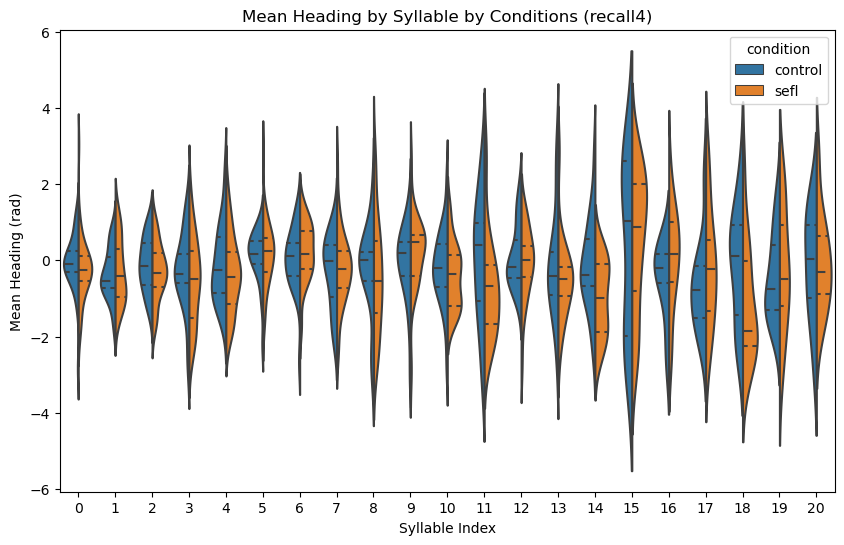

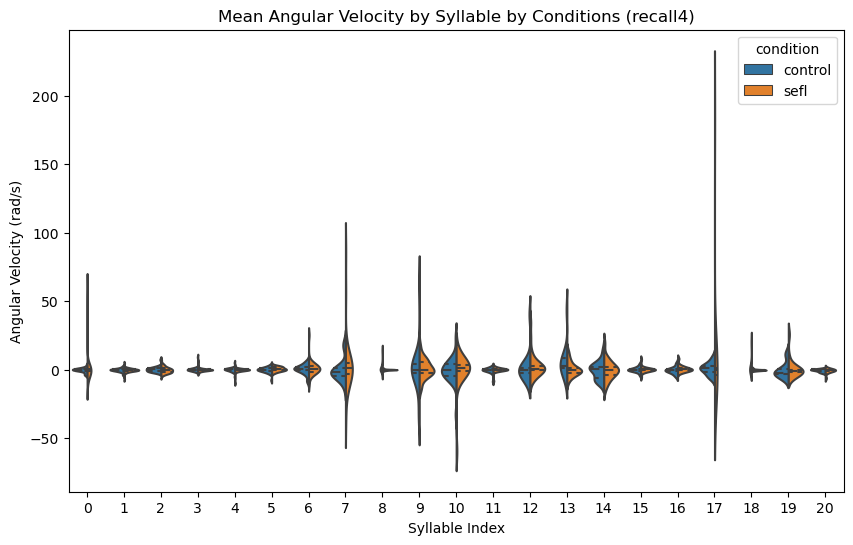

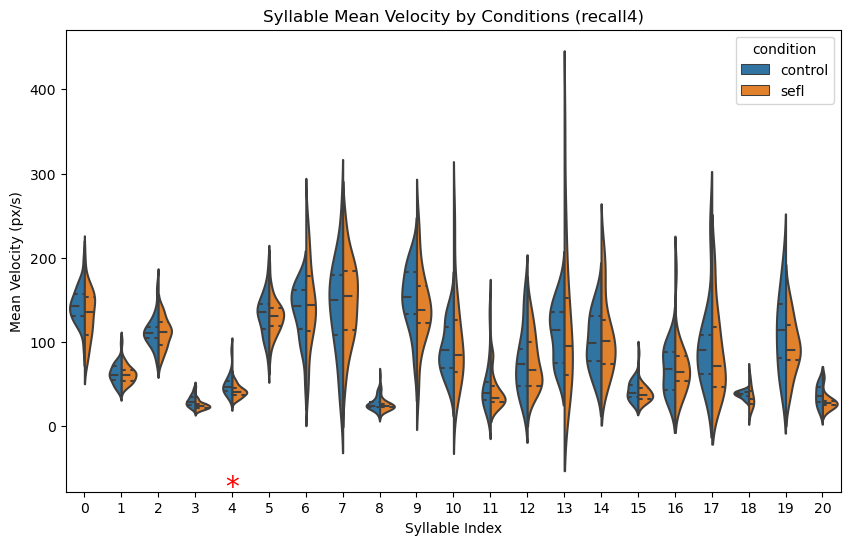

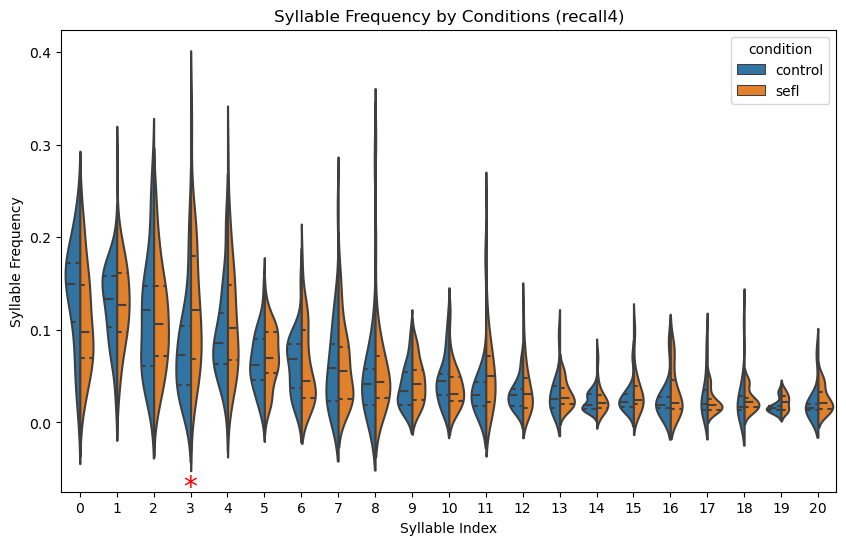

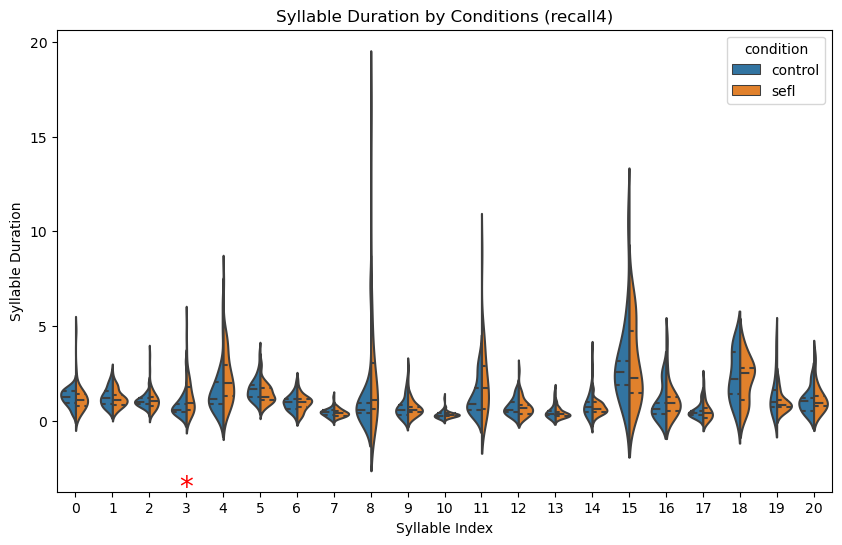

In [ ]:
#violin plot on stats for sefl vs. control (condition)

significant_syllables_heading = []
significant_syllables_angular_velocity = []
significant_syllables_velocity = [4]
significant_syllables_frequency = [3]
significant_syllables_duration = [3]

# Create each plot with asterisks marking significant syllables
create_violin_plot(recall4_moseq_data, 'syllable', 'heading_mean', 'condition', 'Mean Heading by Syllable by Conditions (recall4)', 'Mean Heading (rad)', significant_syllables_heading)
create_violin_plot(recall4_moseq_data, 'syllable', 'angular_velocity_mean', 'condition', 'Mean Angular Velocity by Syllable by Conditions (recall4)', 'Angular Velocity (rad/s)', significant_syllables_angular_velocity)
create_violin_plot(recall4_moseq_data, 'syllable', 'velocity_px_s_mean', 'condition', 'Syllable Mean Velocity by Conditions (recall4)', 'Mean Velocity (px/s)', significant_syllables_velocity)
create_violin_plot(recall4_moseq_data, 'syllable', 'frequency', 'condition', 'Syllable Frequency by Conditions (recall4)', 'Syllable Frequency', significant_syllables_frequency)
create_violin_plot(recall4_moseq_data, 'syllable', 'duration', 'condition', 'Syllable Duration by Conditions (recall4)', 'Syllable Duration', significant_syllables_duration)


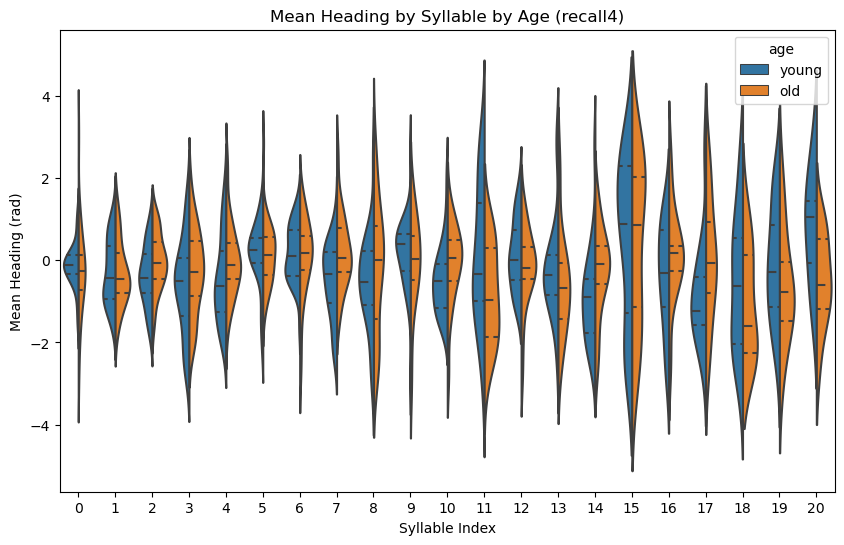

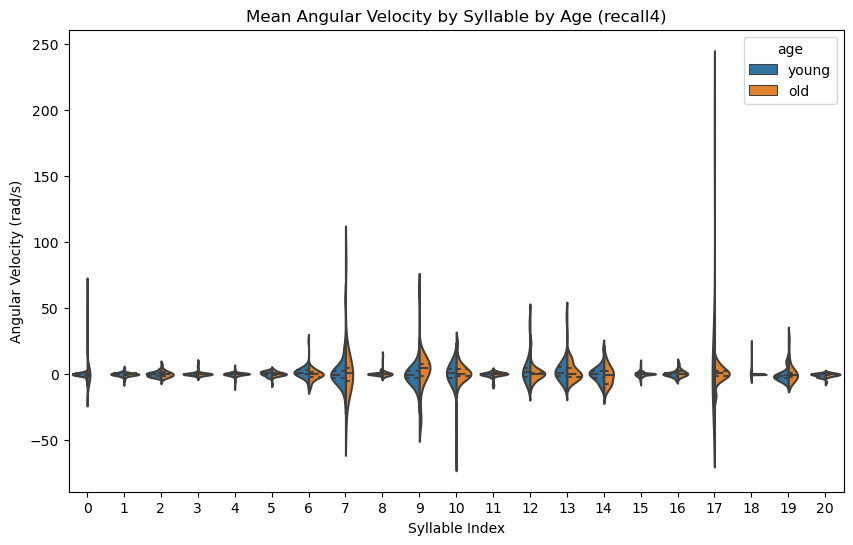

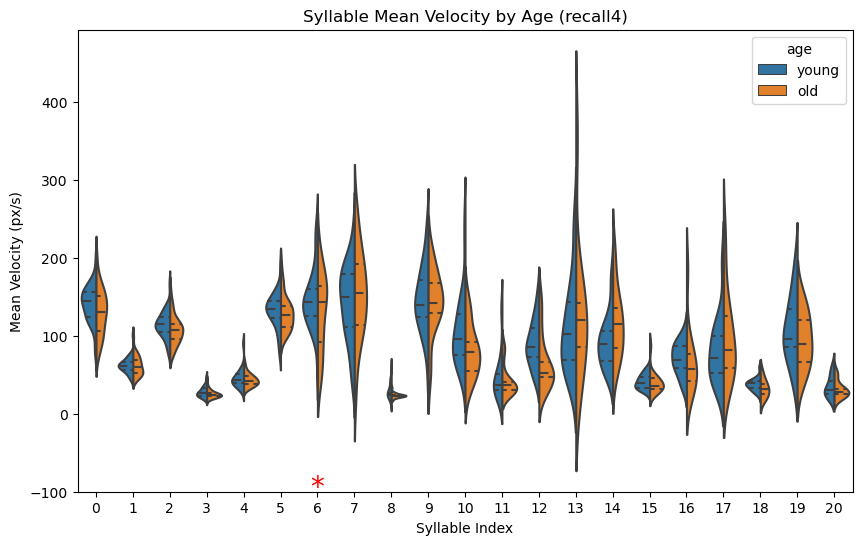

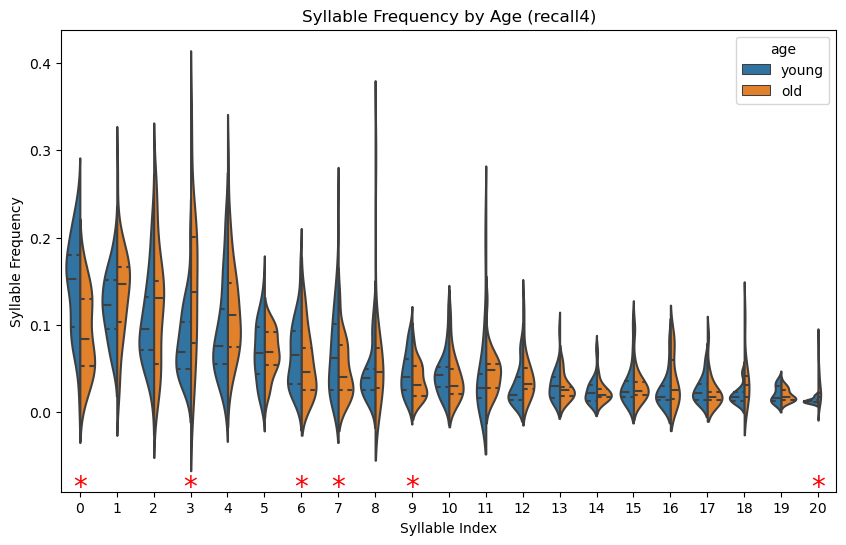

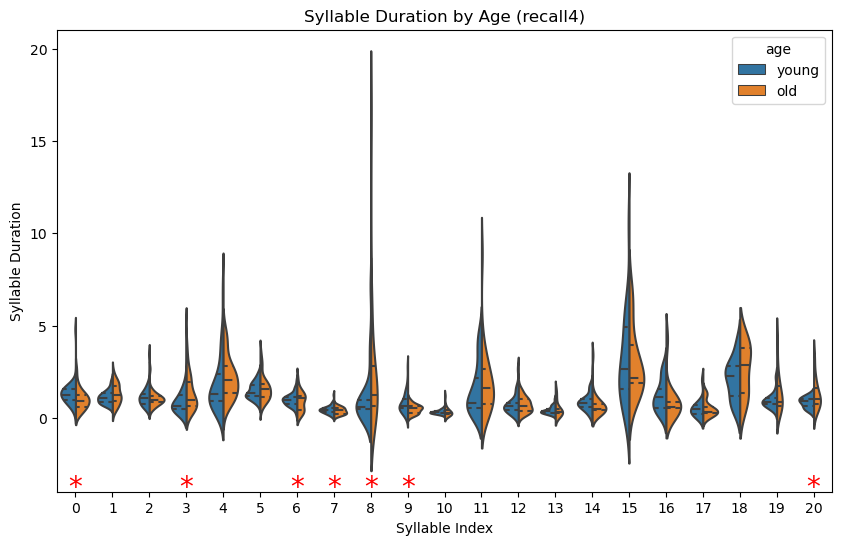

In [ ]:
#violin plot on stats for young vs. old (age)

significant_syllables_heading = []
significant_syllables_angular_velocity = []
significant_syllables_velocity = [6]
significant_syllables_frequency = [0, 3, 6, 7, 9, 20]
significant_syllables_duration = [0, 3, 6, 7, 8, 9, 20]

# Create each plot with asterisks marking significant syllables
create_violin_plot(recall4_moseq_data, 'syllable', 'heading_mean', 'age', 'Mean Heading by Syllable by Age (recall4)', 'Mean Heading (rad)', significant_syllables_heading)
create_violin_plot(recall4_moseq_data, 'syllable', 'angular_velocity_mean', 'age', 'Mean Angular Velocity by Syllable by Age (recall4)', 'Angular Velocity (rad/s)', significant_syllables_angular_velocity)
create_violin_plot(recall4_moseq_data, 'syllable', 'velocity_px_s_mean', 'age', 'Syllable Mean Velocity by Age (recall4)', 'Mean Velocity (px/s)', significant_syllables_velocity)
create_violin_plot(recall4_moseq_data, 'syllable', 'frequency', 'age', 'Syllable Frequency by Age (recall4)', 'Syllable Frequency', significant_syllables_frequency)
create_violin_plot(recall4_moseq_data, 'syllable', 'duration', 'age', 'Syllable Duration by Age (recall4)', 'Syllable Duration', significant_syllables_duration)

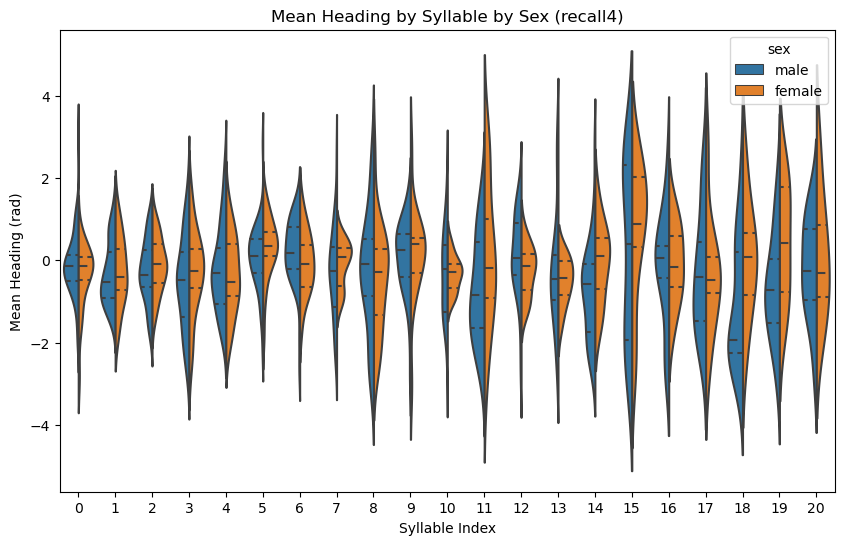

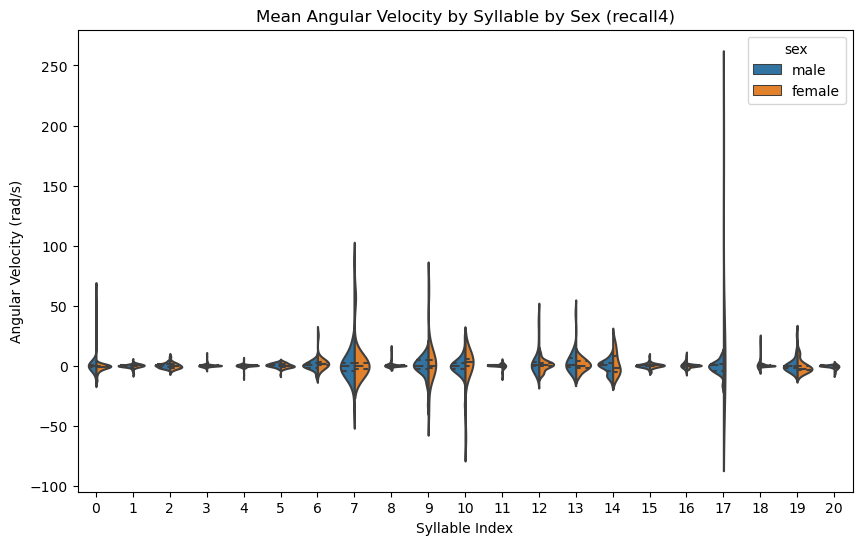

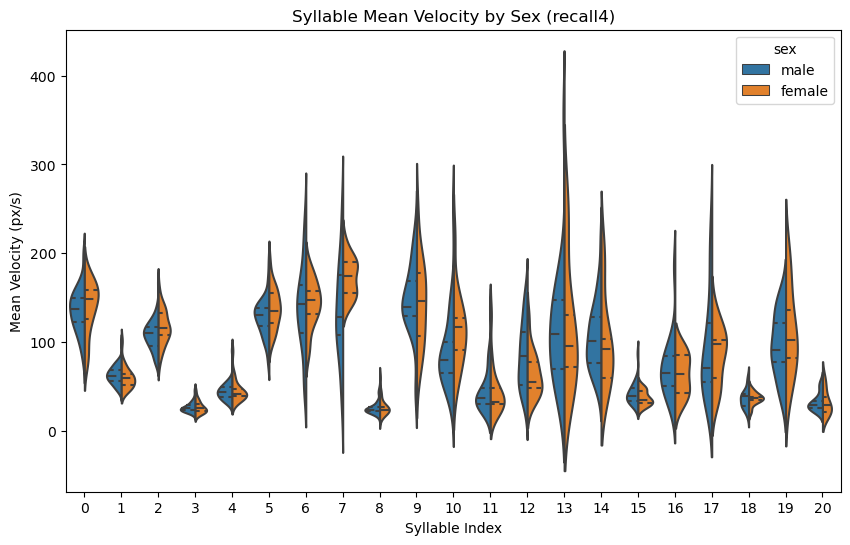

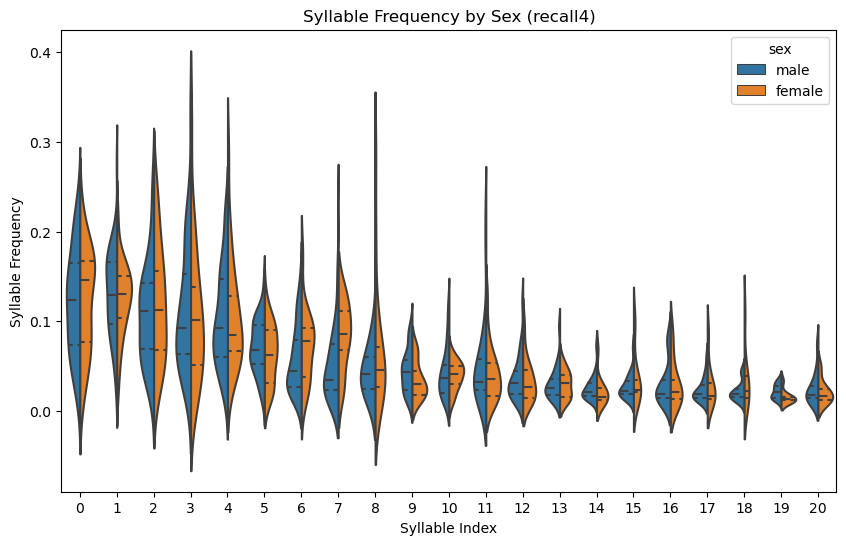

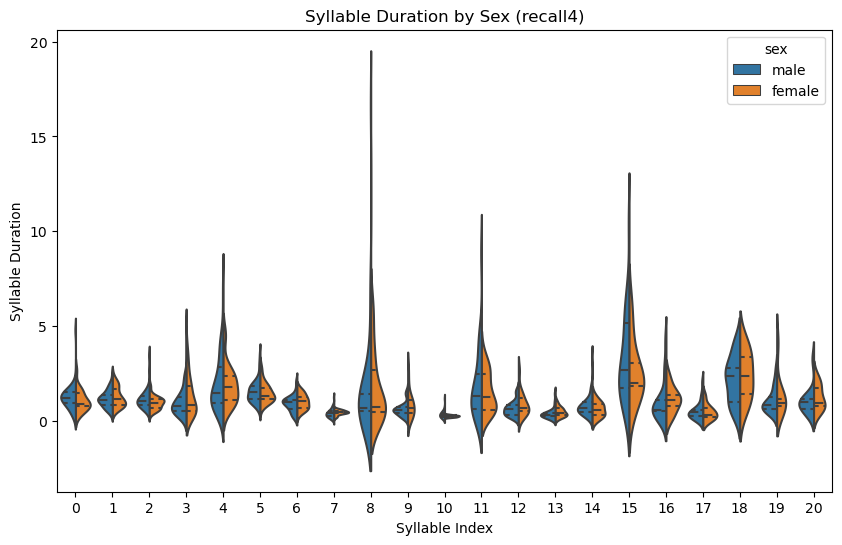

In [ ]:
#violin plot on stats for male vs. female (sex)

significant_syllables_heading = []
significant_syllables_angular_velocity = []
significant_syllables_velocity = []
significant_syllables_frequency = []
significant_syllables_duration = []

# Create each plot with asterisks marking significant syllables
create_violin_plot(recall4_moseq_data, 'syllable', 'heading_mean', 'sex', 'Mean Heading by Syllable by Sex (recall4)', 'Mean Heading (rad)', significant_syllables_heading)
create_violin_plot(recall4_moseq_data, 'syllable', 'angular_velocity_mean', 'sex', 'Mean Angular Velocity by Syllable by Sex (recall4)', 'Angular Velocity (rad/s)', significant_syllables_angular_velocity)
create_violin_plot(recall4_moseq_data, 'syllable', 'velocity_px_s_mean', 'sex', 'Syllable Mean Velocity by Sex (recall4)', 'Mean Velocity (px/s)', significant_syllables_velocity)
create_violin_plot(recall4_moseq_data, 'syllable', 'frequency', 'sex', 'Syllable Frequency by Sex (recall4)', 'Syllable Frequency', significant_syllables_frequency)
create_violin_plot(recall4_moseq_data, 'syllable', 'duration', 'sex', 'Syllable Duration by Sex (recall4)', 'Syllable Duration', significant_syllables_duration)

In [ ]:
recall1_moseq_data

,condition,name,syllable,heading_mean,heading_std,heading_min,heading_max,angular_velocity_mean,angular_velocity_std,angular_velocity_min,angular_velocity_max,velocity_px_s_mean,velocity_px_s_std,velocity_px_s_min,velocity_px_s_max,frequency,duration,age,sex,velocity_cat
0,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,0,0.626208,1.852853,-3.108747,3.122723,-0.000510,17.404694,-183.203679,188.040866,81.701471,75.348639,1.813967,420.626644,0.203390,1.305556,young,male,medium
1,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,1,0.047414,1.886025,-3.118931,3.088203,-0.306084,21.693177,-186.768078,186.453910,114.326372,71.326542,5.065943,324.631877,0.084746,2.040000,young,male,high
2,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,2,2.541553,0.006534,2.530331,2.554167,0.513064,1.403439,-1.160512,3.587451,19.581478,13.585931,1.088061,45.789062,0.016949,0.800000,young,male,low
3,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,3,1.040338,2.274850,-2.304735,2.978832,-5.650671,33.930670,-185.178904,3.523885,29.659879,24.827263,1.021446,113.470288,0.084746,0.400000,young,male,low
4,control,2_81DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,4,1.190056,0.914027,-2.351293,2.675502,0.466974,4.355024,-5.952834,13.459587,98.441224,64.394974,3.216328,286.923149,0.084746,1.426667,young,male,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,control,9_31-5DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,11,1.857470,1.800984,-2.507236,2.917606,13.428687,58.629424,-29.274215,156.432405,203.460257,57.037362,116.795919,270.039870,0.028571,0.266667,old,male,high
958,control,9_31-5DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,12,-0.570847,2.473899,-3.123519,2.755230,7.899309,48.749644,-8.040998,183.907014,110.572597,32.173743,66.942152,176.535153,0.028571,0.500000,old,male,high
959,control,9_31-5DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,13,1.115181,2.509254,-3.133716,3.140583,-2.560994,38.782539,-188.238177,188.247062,59.697951,48.124389,2.044966,253.880697,0.028571,2.366667,old,male,medium
960,control,9_31-5DLC_resnet50_phi_cfc_boxNov7shuffle1_388000,15,1.131259,2.504877,-3.116860,3.110836,12.241416,66.921938,-24.136893,176.862188,170.378660,38.686219,82.618211,202.196474,0.014286,0.533333,old,male,high
